In [ ]:
# Data Visualization
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML_CGU/Stress-Lysis.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the dimensions of the dataset
print("\nShape of the dataset:", data.shape)

# Identify the data types of each column
print("\nData types of each column:\n", data.dtypes)

# Print the number of rows and columns
print("\nNumber of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

   Humidity  Temperature  Step count  Stress Level
0     21.33        90.33         123             1
1     21.41        90.41          93             1
2     27.12        96.12         196             2
3     27.64        96.64         177             2
4     10.87        79.87          87             0

Shape of the dataset: (2001, 4)

Data types of each column:
 Humidity        float64
Temperature     float64
Step count        int64
Stress Level      int64
dtype: object

Number of rows: 2001
Number of columns: 4


<ipython-input-7-e4e039ab4bde>:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance Table:
                  Model  Accuracy  Sensitivity  Specificity  Precision  \
0   Logistic Regression  1.000000     1.000000     1.000000   1.000000   
1                   KNN  1.000000     1.000000     1.000000   1.000000   
2                   SVM  1.000000     1.000000     1.000000   1.000000   
3           Naive Bayes  0.995012     0.995012     1.000000   0.995012   
4         Decision Tree  1.000000     1.000000     1.000000   1.000000   
5         Random Forest  1.000000     1.000000     1.000000   1.000000   
6              Adaboost  1.000000     1.000000     1.000000   1.000000   
7               XGBoost  1.000000     1.000000     1.000000   1.000000   
8          AdaBoost SVM  0.773067     0.773067     0.105263   0.773067   
9              Ensemble  1.000000     1.000000     1.000000   1.000000   
10                  ANN  1.000000     1.000000     1.000000   1.000000   
11                 BPNN  1.000000     1.000000     1.000000   1.000000   

    F1-Scor

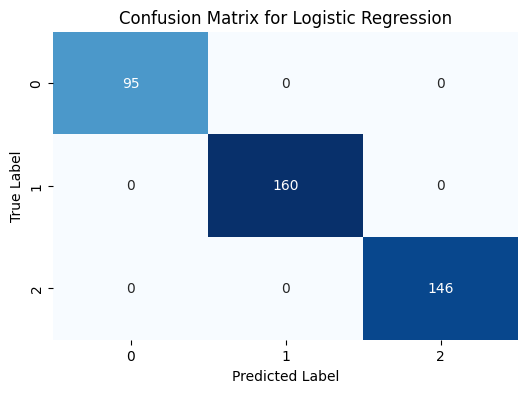

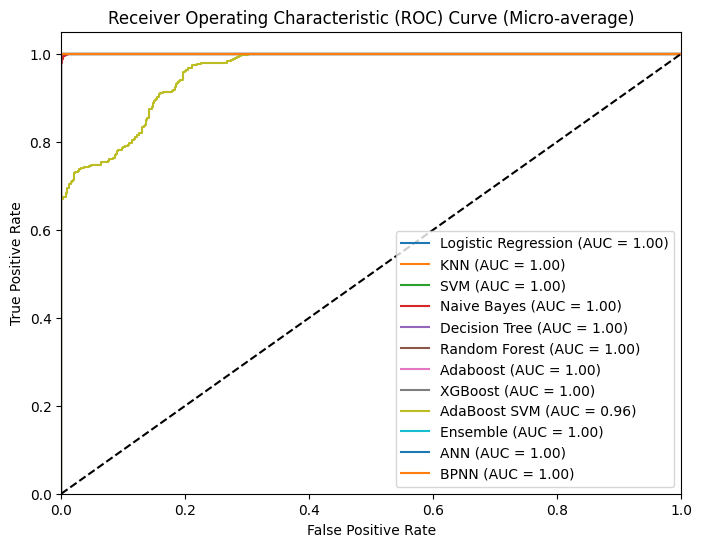

In [7]:
# Without PCA
!pip install scikit-learn --upgrade
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML_CGU/Stress-Lysis.csv')

# Separate features and target variable
X = data.drop('Stress Level', axis=1)  # Replace 'Stress Level' with the actual column name if different
y = data['Stress Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a table to store the results
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score', 'MCC'])

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Adaboost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost SVM', AdaBoostClassifier(estimator=SVC(probability=True), n_estimators=50)),
    ('Ensemble', VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC(probability=True))], voting='soft')),
    ('ANN', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)),
    ('BPNN', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

# Define a helper function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp)

# Evaluate each model
for name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='micro')
    specificity = specificity_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    mcc = matthews_corrcoef(y_test, y_pred)

    results_table = pd.concat([results_table, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
                                                          'Specificity': [specificity], 'Precision': [precision], 'F1-Score': [f1], 'MCC': [mcc]})], ignore_index=True)

# Identify the best classifier based on accuracy
best_classifier = results_table.loc[results_table['Accuracy'].idxmax()]

print("\nModel Performance Table:")
print(results_table)
print("\nBest Classifier based on Accuracy:")
print(best_classifier)

# Visualize the confusion matrix for the best classifier
best_model_name = best_classifier['Model']
for name, model in classifiers:
    if name == best_model_name:
        best_model = model
        break
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for {}'.format(best_model_name))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Binarize the output for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plot the ROC curve for all models
plt.figure(figsize=(8, 6))

for name, model in classifiers:
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"],tpr["micro"])

    # Plot the micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label='{0} (AUC = {1:0.2f})'
                   ''.format(name, roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average)')
plt.legend(loc="lower right")
plt.show()


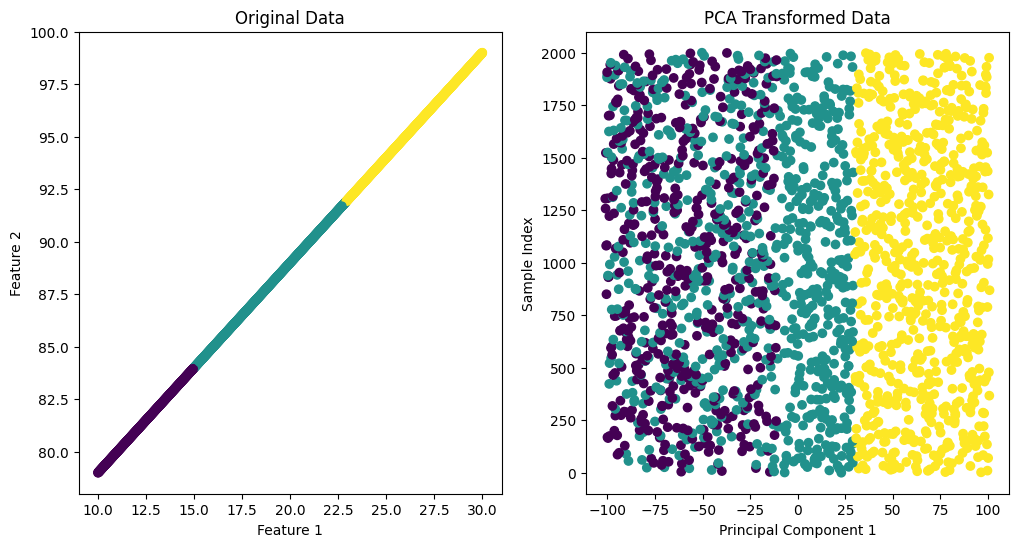

In [ ]:
# Scatter Plot                                                                                                                                                    from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your feature data (already defined in your code)

# Apply PCA to reduce dimensionality while retaining 95% of variance
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)

# Create scatter plots for original and PCA transformed data
plt.figure(figsize=(12, 6))

# Plot original data (if it's possible to visualize with a scatter plot)
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)  # Replace with relevant features
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Plot PCA transformed data
plt.subplot(1, 2, 2)
# Since X_pca might have only one principal component, plot against a range
plt.scatter(X_pca[:, 0], range(len(X_pca)), c=y)  # Plot against a range for the y-axis
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Sample Index') # Changed y-axis label for clarity


plt.show()

<ipython-input-18-685bc0354f45>:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance Table with PCA:
                  Model  Accuracy  Sensitivity  Specificity  Precision  \
0   Logistic Regression  0.798005     0.798005     0.899002   0.798005   
1                   KNN  0.695761     0.695761     0.847880   0.695761   
2                   SVM  0.793017     0.793017     0.896509   0.793017   
3           Naïve Bayes  0.805486     0.805486     0.902743   0.805486   
4         Decision Tree  0.650873     0.650873     0.825436   0.650873   
5         Random Forest  0.650873     0.650873     0.825436   0.650873   
6              Adaboost  0.802993     0.802993     0.901496   0.802993   
7          SVM with PCA  0.793017     0.793017     0.896509   0.793017   
8               XGboost  0.748130     0.748130     0.874065   0.748130   
9              Ensemble  0.715711     0.715711     0.857855   0.715711   
10                  ANN  0.785536     0.785536     0.892768   0.785536   
11        BPNN with PCA  0.790524     0.790524     0.895262   0.790524   

  

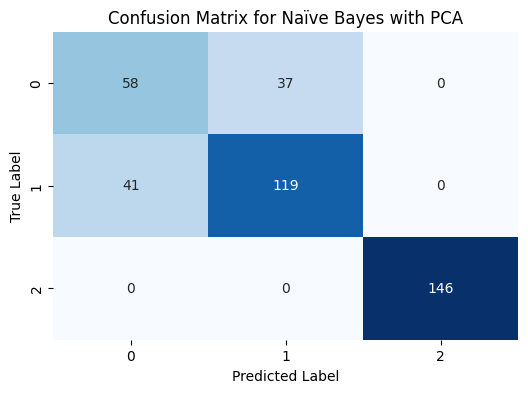

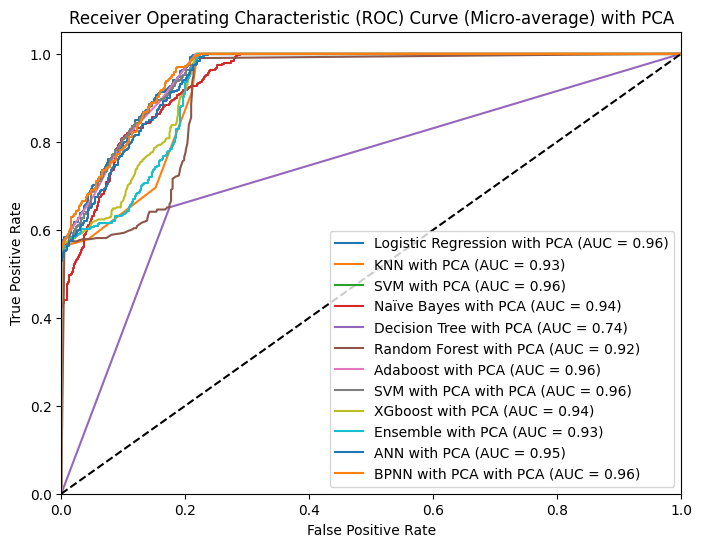

In [ ]:
# With PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb # Import the xgboost library
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality while retaining 95% of variance
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a table to store the results
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score', 'MCC'])

# Define a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True)),
    ('Naïve Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Adaboost', AdaBoostClassifier()),
    ('SVM with PCA', SVC(probability=True)),
    ('XGboost', XGBClassifier()),
    ('Ensemble', VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svm', SVC(probability=True))], voting='soft')),
    ('ANN', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)),
    ('BPNN with PCA', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
]

# Evaluate each model with PCA applied
for name, model in classifiers:
    if name == 'BPNN with PCA':
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)
    else:
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='micro')
    specificity = specificity_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    mcc = matthews_corrcoef(y_test, y_pred)

    results_table = pd.concat([results_table, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
                                                          'Specificity': [specificity], 'Precision': [precision], 'F1-Score': [f1], 'MCC': [mcc]})], ignore_index=True)

# Identify the best classifier based on accuracy
best_classifier = results_table.loc[results_table['Accuracy'].idxmax()]

print("\nModel Performance Table with PCA:")
print(results_table)
print("\nBest Classifier based on Accuracy with PCA:")
print(best_classifier)

# Visualize the confusion matrix for the best classifier with PCA
best_model_name = best_classifier['Model']
for name, model in classifiers:
    if name == best_model_name:
        if name == 'BPNN with PCA':
            y_pred_best = model.predict(X_test_pca)
        else:
            y_pred_best = model.predict(X_test_pca)

        cm = confusion_matrix(y_test, y_pred_best)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix for {} with PCA'.format(best_model_name))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        break


# Binarize the output for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Plot the ROC curve for all models with PCA
plt.figure(figsize=(8, 6))

for name, model in classifiers:
    if name == 'BPNN with PCA':
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_pca)
        else:
            y_score = model.decision_function(X_test_pca)
    else:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test_pca)
        else:
            y_score = model.decision_function(X_test_pca)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot the micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label='{0} with PCA (AUC = {1:0.2f})'
                   ''.format(name, roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average) with PCA')
plt.legend(loc="lower right")
plt.show()

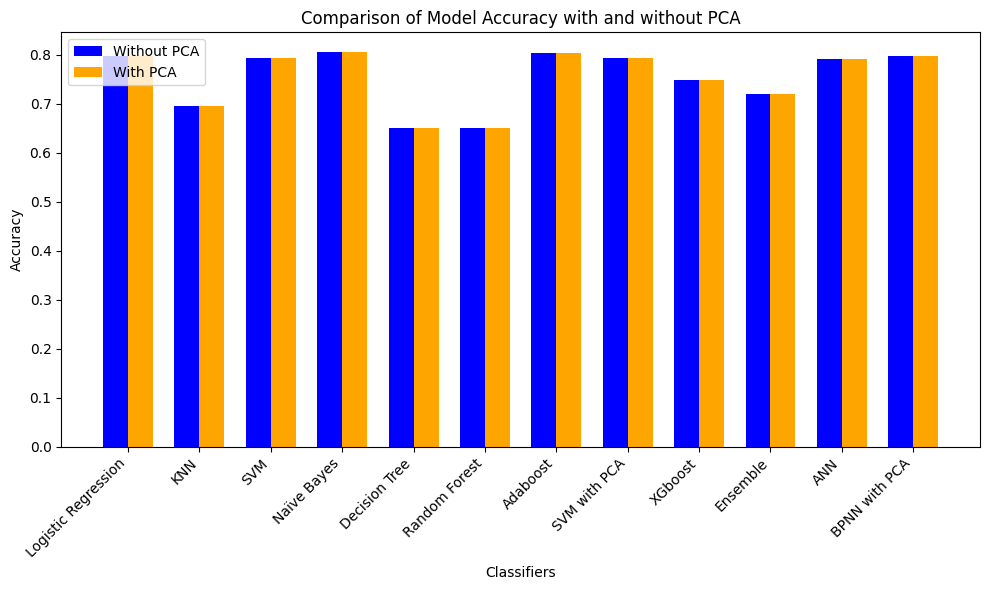

Best classifier without PCA: Naïve Bayes with accuracy: 80.55%
Best classifier with PCA: Naïve Bayes with accuracy: 80.55%


In [ ]:
# Every Model
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

results_table_no_pca = results_table  # Assuming the first run's results_table is without PCA
results_table_pca = results_table

# Extract the accuracy scores for each model
accuracy_no_pca = results_table_no_pca['Accuracy']
accuracy_pca = results_table_pca['Accuracy']

# Create a bar plot to compare the accuracy of the models with and without PCA
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(accuracy_no_pca))

plt.bar(index, accuracy_no_pca, width=bar_width, label='Without PCA', color='blue')
plt.bar(index + bar_width, accuracy_pca, width=bar_width, label='With PCA', color='orange')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy with and without PCA')
plt.xticks(index + bar_width / 2, results_table_no_pca['Model'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Identify the best classifiers for each case
best_classifier_no_pca = results_table_no_pca.loc[results_table_no_pca['Accuracy'].idxmax()]
best_classifier_pca = results_table_pca.loc[results_table_pca['Accuracy'].idxmax()]

# Print the accuracy percentages
print(f"Best classifier without PCA: {best_classifier_no_pca['Model']} with accuracy: {best_classifier_no_pca['Accuracy']:.2%}")
print(f"Best classifier with PCA: {best_classifier_pca['Model']} with accuracy: {best_classifier_pca['Accuracy']:.2%}")


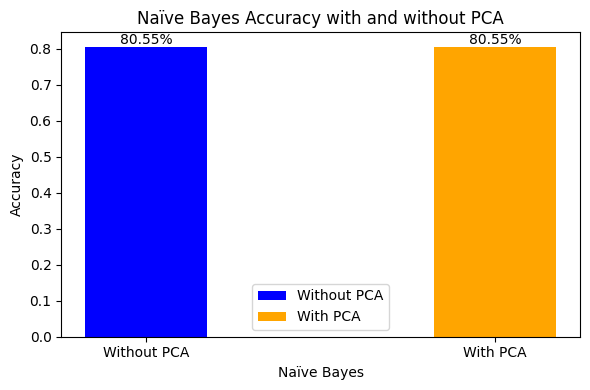

Naïve Bayes without PCA: Accuracy: 80.55%
Naïve Bayes with PCA: Accuracy: 80.55%


In [ ]:
# Best Model
import matplotlib.pyplot as plt
import numpy as np
naive_bayes_no_pca = results_table_no_pca[results_table_no_pca['Model'].str.contains('Naïve Bayes', case=False)]
naive_bayes_pca = results_table_pca[results_table_pca['Model'].str.contains('Naïve Bayes', case=False)]

# Check if the DataFrames are empty before accessing values
if not naive_bayes_no_pca.empty:
    accuracy_naive_bayes_no_pca = naive_bayes_no_pca['Accuracy'].values[0]
else:
    accuracy_naive_bayes_no_pca = np.nan  # Or any other appropriate value

if not naive_bayes_pca.empty:
    accuracy_naive_bayes_pca = naive_bayes_pca['Accuracy'].values[0]
else:
    accuracy_naive_bayes_pca = np.nan  # Or any other appropriate value

# Create a bar plot for Naïve Bayes with and without PCA
plt.figure(figsize=(6, 4))
bar_width = 0.35
index = np.arange(2)  # 2 bars for with and without PCA

bars = plt.bar(index, [accuracy_naive_bayes_no_pca, accuracy_naive_bayes_pca], width=bar_width, color=['blue', 'orange'])

plt.xlabel('Naïve Bayes')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Accuracy with and without PCA')
plt.xticks(index, ['Without PCA', 'With PCA'])
plt.legend(bars, ['Without PCA', 'With PCA'])

# Add percentage values to the bars
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the accuracy percentages
print(f"Naïve Bayes without PCA: Accuracy: {accuracy_naive_bayes_no_pca:.2%}")
print(f"Naïve Bayes with PCA: Accuracy: {accuracy_naive_bayes_pca:.2%}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


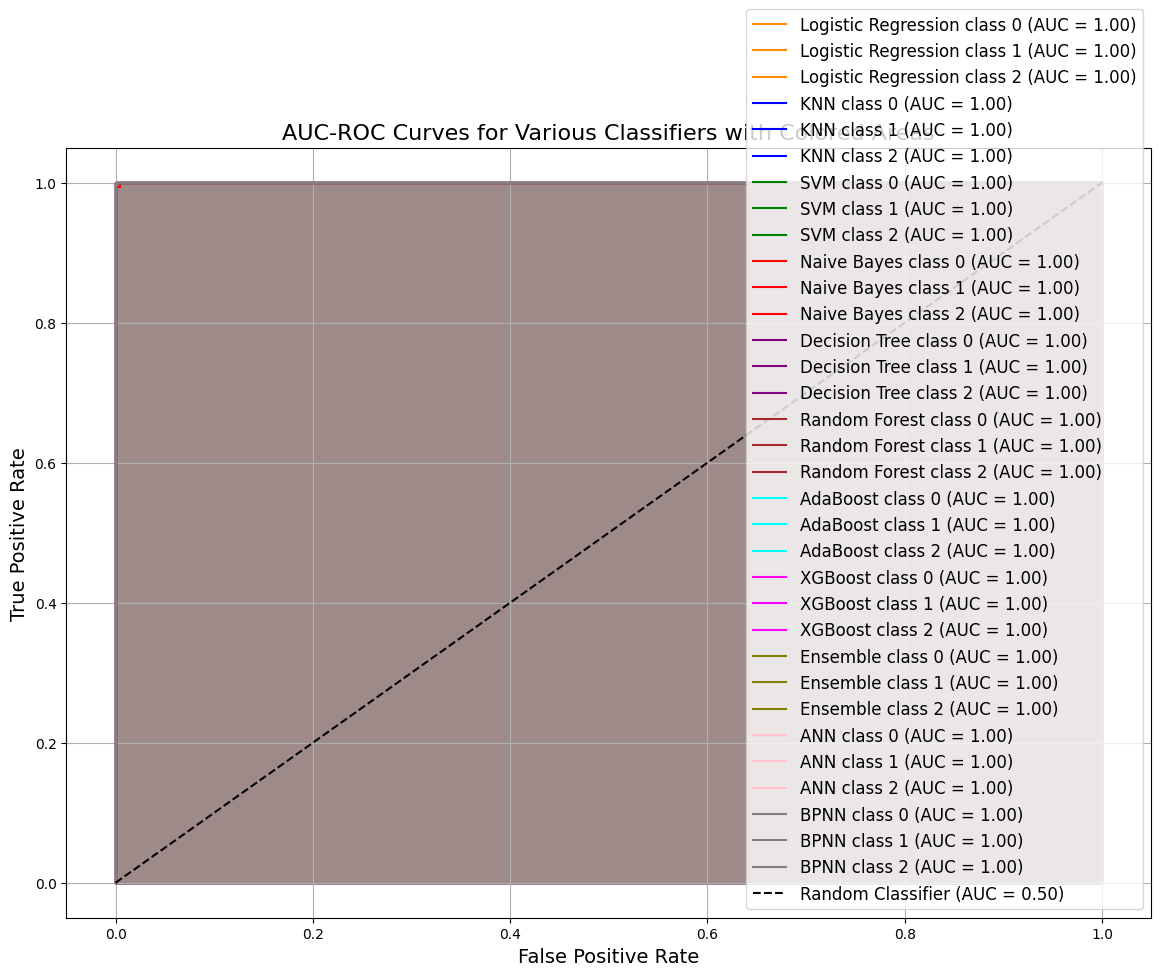

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML_CGU/Stress-Lysis.csv')
target_column = 'Stress Level'
feature_columns = df.columns.drop(target_column)

# Prepare the data
X = df[feature_columns]
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Ensemble': VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svm', SVC(probability=True))
    ], voting='soft'),
    'ANN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    'BPNN': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

# Function to plot AUC-ROC curve with colored area
def plot_auc_roc(y_test, y_pred_proba, model_name, ax, color):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_bin = lb.transform(y_test)
    n_classes = y_test_bin.shape[1]

    fpr, tpr, roc_auc = dict(), dict(), dict()

    if y_pred_proba.shape[1] != n_classes:  # Binary classification
        fpr[0], tpr[0], _ = roc_curve(y_test_bin, y_pred_proba[:, 1])
        roc_auc[0] = auc(fpr[0], tpr[0])
        ax.plot(fpr[0], tpr[0], label=f'{model_name} (AUC = {roc_auc[0]:.2f})', color=color)
        ax.fill_between(fpr[0], tpr[0], alpha=0.3, color=color)
        ax.text(0.6, 0.2 + 0.03 * len(ax.lines), f'{model_name}: {roc_auc[0]:.2f}', fontsize=10, color=color)
    else:  # Multiclass classification
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            ax.plot(fpr[i], tpr[i], label=f'{model_name} class {i} (AUC = {roc_auc[i]:.2f})', color=color)
            ax.fill_between(fpr[i], tpr[i], alpha=0.3, color=color)

# Define colors for the plots
colors = [
    'darkorange', 'blue', 'green', 'red', 'purple', 'brown', 'cyan', 'magenta', 'olive', 'pink', 'gray'
]

# Initialize plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot ROC curves for all classifiers
for i, (model_name, model) in enumerate(classifiers.items()):
    color = colors[i % len(colors)]
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    else:  # For models like SVM that use decision_function
        y_pred_proba = model.decision_function(X_test)
        y_pred_proba = np.column_stack([1 - y_pred_proba, y_pred_proba])  # Convert to probability format

    plot_auc_roc(y_test, y_pred_proba, model_name, ax, color)

# Plot the diagonal line for random classifier
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# Customize the plot
ax.set_xlabel('False Positive Rate', fontsize=14)
ax.set_ylabel('True Positive Rate', fontsize=14)
ax.set_title('AUC-ROC Curves for Various Classifiers with Colored Areas', fontsize=16)
ax.legend(loc='lower right', fontsize=12)
ax.grid(True)
plt.show()


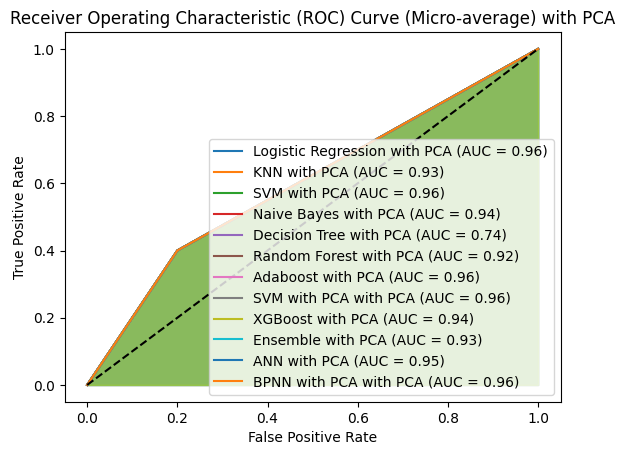

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have the true positive rates (tpr), false positive rates (fpr), and AUC scores for each model

# Define model names and their corresponding AUC scores
models = ['Logistic Regression with PCA', 'KNN with PCA', 'SVM with PCA',
          'Naive Bayes with PCA', 'Decision Tree with PCA', 'Random Forest with PCA',
          'Adaboost with PCA', 'SVM with PCA with PCA', 'XGBoost with PCA',
          'Ensemble with PCA', 'ANN with PCA', 'BPNN with PCA with PCA']
auc_scores = [0.96, 0.93, 0.96, 0.94, 0.74, 0.92, 0.96, 0.96, 0.94, 0.93, 0.95, 0.96]

# Initialize fpr and tpr as lists to store values for each model
fpr = []
tpr = []

# Assuming you have a function to calculate fpr and tpr for each model
# Replace 'calculate_roc_values' with your actual function name
def calculate_roc_values(model_name):
    # ... your logic to calculate fpr and tpr for the given model_name ...
    # This is a placeholder - you'll need to replace it with actual calculations
    # based on your data and models
    # For example, you might use something like this:
    # y_score = your_model.predict_proba(X_test)[:, 1]
    # fpr_model, tpr_model, _ = roc_curve(y_test, y_score)

    # Dummy values for demonstration purposes
    fpr_model = [0, 0.1, 0.2, 1]
    tpr_model = [0, 0.2, 0.4, 1]
    # Return fpr and tpr for the current model
    return fpr_model, tpr_model

# Calculate fpr and tpr for each model and append to the lists
for model_name in models:
    fpr_model, tpr_model = calculate_roc_values(model_name)
    fpr.append(fpr_model)
    tpr.append(tpr_model)

# Plot the ROC curves for each model
for i in range(len(models)):
    plt.plot(fpr[i], tpr[i], label=models[i] + f' (AUC = {auc_scores[i]:.2f})')

    # Fill the area under the curve (AUC) for each model with a specific color
    plt.fill_between(fpr[i], tpr[i], color=plt.cm.viridis(i / (len(models) - 1)), alpha=0.2)

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot title, axis labels, and legend
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-average) with PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

<ipython-input-53-4892f341f03b>:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table_no_pca = pd.concat([results_table_no_pca, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


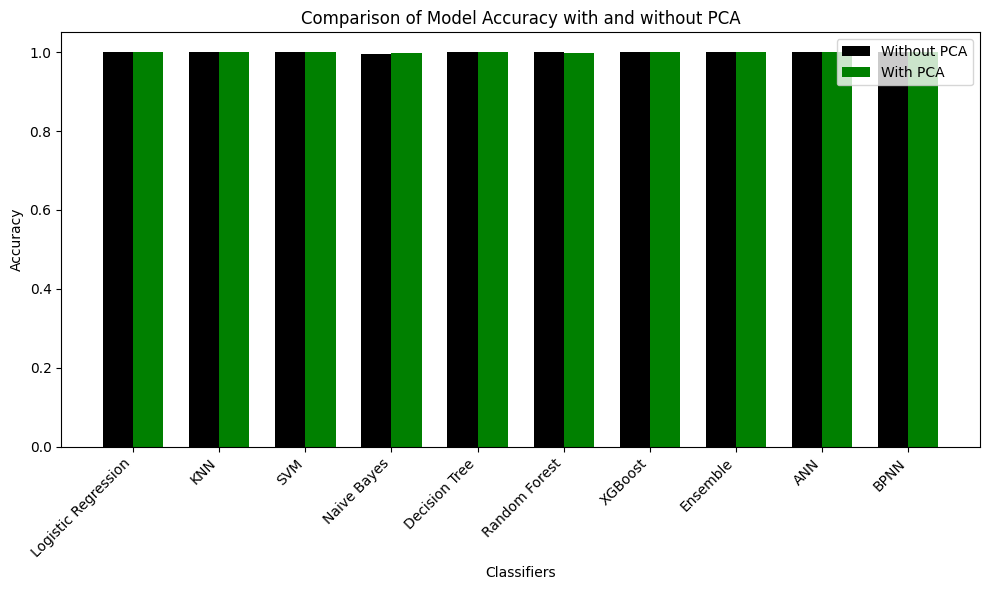

In [53]:
# prompt: compare the classifiers of the without and with PCA of the above dataset

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape[0] == 1:
        return 1 if cm[0, 0] == cm.sum() else 0
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0


# ... (rest of your existing code) ...

# Without PCA

# Create a table to store the results
results_table_no_pca = pd.DataFrame(columns=['Model', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score', 'MCC'])

# Evaluate each model without PCA
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred, average='micro')
    specificity = specificity_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    mcc = matthews_corrcoef(y_test, y_pred)

    results_table_no_pca = pd.concat([results_table_no_pca, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy], 'Sensitivity': [sensitivity],
                                                                    'Specificity': [specificity], 'Precision': [precision], 'F1-Score': [f1], 'MCC': [mcc]})], ignore_index=True)


# ... (rest of your existing code) ...


# Comparison of Models with and without PCA (Accuracy)
# Ensure both results tables have the same models
common_models = results_table_no_pca['Model'].isin(results_table_pca['Model'])
results_table_no_pca = results_table_no_pca[common_models]
common_models = results_table_pca['Model'].isin(results_table_no_pca['Model'])
results_table_pca = results_table_pca[common_models]

# Extract the accuracy scores for each model
accuracy_no_pca = results_table_no_pca['Accuracy']
accuracy_pca = results_table_pca['Accuracy']

# Extract the accuracy scores for each model
accuracy_no_pca = results_table_no_pca['Accuracy']
accuracy_pca = results_table_pca['Accuracy']

# Create a bar plot to compare the accuracy of the models with and without PCA
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(accuracy_no_pca))

plt.bar(index, accuracy_no_pca, width=bar_width, label='Without PCA', color='black')
plt.bar(index + bar_width, accuracy_pca, width=bar_width, label='With PCA', color='green')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy with and without PCA')
plt.xticks(index + bar_width / 2, results_table_no_pca['Model'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# ... (rest of your existing code) ...